# **Diabetes Prediction**

#### **Importing Required Modules**

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

#### **Reading the dataset**

In [500]:
df=pd.read_csv('./Dataset/diabetes.csv')

In [501]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [503]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [504]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### **EDA**

**Pregnancies**

While there's no strict scientific limit, a study estimated that a woman can have around 15 pregnancies in a lifetime.

In [505]:
(df['Pregnancies'] > 15).value_counts()

Pregnancies
False    767
True       1
Name: count, dtype: int64

In [506]:
df.drop(df[df['Pregnancies']>15].index, inplace=True)

#### **Dividing into Input and Output**

In [507]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

#### **Feature Scaling**

In [508]:
scaler=StandardScaler()

In [509]:
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [510]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.651131,0.850452,0.149740,0.909329,-0.692092,0.205524,0.469878,1.427868
1,-0.847721,-1.122219,-0.160249,0.532801,-0.692092,-0.683073,-0.363723,-0.189191
2,1.250672,1.946380,-0.263578,-1.287084,-0.692092,-1.101982,0.605791,-0.104083
3,-0.847721,-0.996970,-0.160249,0.156273,0.123615,-0.492659,-0.919456,-1.040276
4,-1.147491,0.506017,-1.503534,0.909329,0.765768,1.411477,5.486582,-0.018975
...,...,...,...,...,...,...,...,...
762,1.850213,-0.621223,0.356400,1.725139,0.869901,0.116665,-0.907375,2.534278
763,-0.547951,0.036334,0.046411,0.407292,-0.692092,0.611740,-0.396946,-0.529625
764,0.351361,0.005021,0.149740,0.156273,0.279815,-0.733850,-0.683874,-0.274300
765,-0.847721,0.161583,-0.470238,-1.287084,-0.692092,-0.238774,-0.369763,1.172543


#### **Train Test Split**

In [511]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### **Model Training**

**1. SVM**

In [512]:
from sklearn.svm import SVC

In [513]:
svc=SVC(kernel='linear', random_state=42)

In [514]:
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

**Performace Metrics**

In [515]:
Y_Pred_svc=svc.predict(X_test)

In [516]:
acc_svc=accuracy_score(Y_test, Y_Pred_svc)
print(acc_svc)

0.7727272727272727


**2. Logistic Regression**

In [517]:
from sklearn.linear_model import LogisticRegression

In [518]:
lreg=LogisticRegression()

In [519]:
lreg.fit(X_train, Y_train)

LogisticRegression()

**Performance Metrics**

In [520]:
Y_Pred_lreg=lreg.predict(X_test)

In [521]:
acc_lreg=accuracy_score(Y_test, Y_Pred_lreg)
print(acc_lreg)

0.7922077922077922


#### **Compare Models**

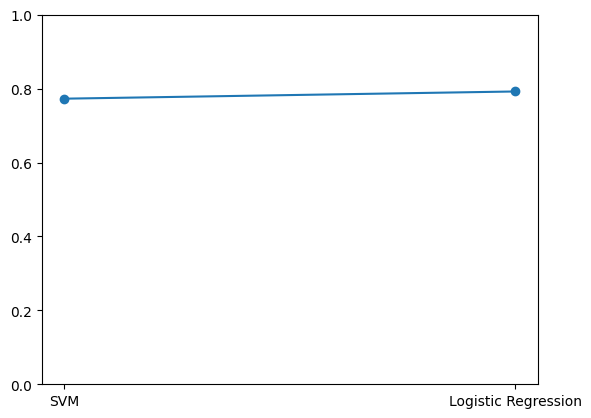

In [522]:

plt.plot(['SVM', 'Logistic Regression'], [acc_svc, acc_lreg], marker='o')
plt.ylim([0,1])
plt.show()

#### **Conclusion**

Both the model has similar Accuracy score but logistic regression peforms slightly better.

#### **Saving the model**

In [523]:
with open('logistic_reg.pkl', 'wb') as file:
    pickle.dump(lreg, file)

In [524]:
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)